In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def load_image(file_path):
    return np.loadtxt(file_path, dtype=np.uint8)

image = load_image('/content/Mapa_MD_no_terrain_low_res_Gray.txt')

Ściemnienie obrazu o dowolną wartość % z zakresu od 1 do 99

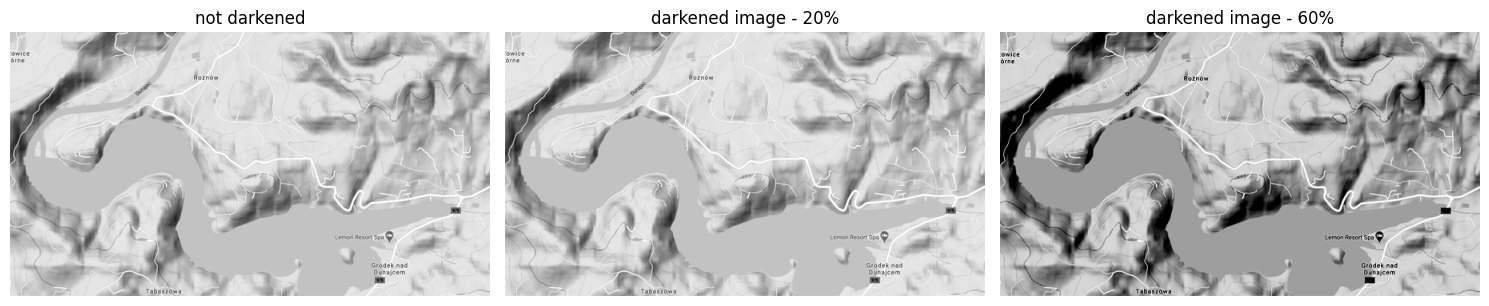

In [35]:
def darken_image(image, amount):
    subtract_value = (255 * amount) / 100
    return np.clip(image - subtract_value, 0, 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# oryginal
axes[0].imshow(image, cmap='gray')
axes[0].set_title('not darkened')
axes[0].axis('off')

# ściemnienie o 20%
darkened_image_1 = darken_image(image, 20)
axes[1].imshow(darkened_image_1, cmap='gray')
axes[1].set_title('darkened image - 20%')
axes[1].axis('off')

# ściemnienie o 60%
darkened_image_2 = darken_image(image, 60)
axes[2].imshow(darkened_image_2, cmap='gray')
axes[2].set_title('darkened image - 60%')
axes[2].axis('off')

plt.tight_layout()
plt.show()

Rozjaśnienie obrazu seryjnie (wynikiem mają być 3 obrazy) - krokowo o dowolną wartość % z zakresu od 10 do 20

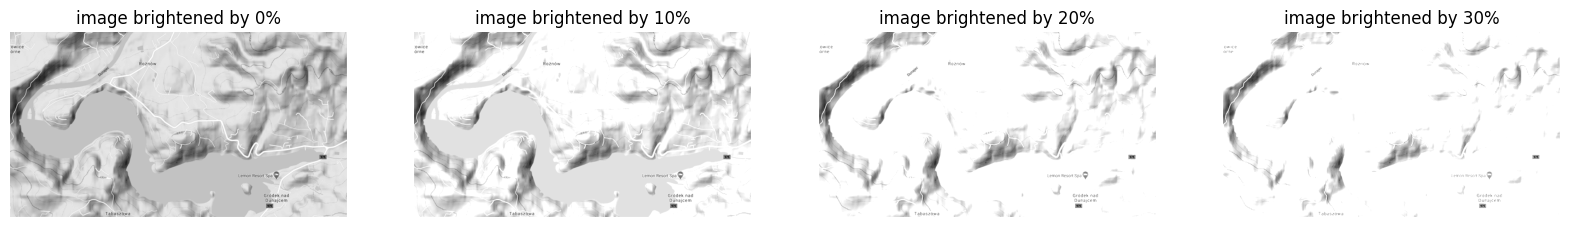

In [23]:
def brighten_image(image, percentage):
    factor = 1 + percentage / 100
    return np.clip(image * factor, 0, 255).astype(np.uint8)

# rozjaśnienie o 10%, 20%, 30%
brightened_images = [brighten_image(image, p) for p in [0, 10, 20, 30]]

plt.figure(figsize=(20, 5))
for i, img in enumerate(brightened_images):
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'image brightened by {0 + i * 10}%')
    plt.axis('off')
plt.show()


Binaryzacja - wynikiem ma być 1 obraz wraz z arbitralnym progiem 50%

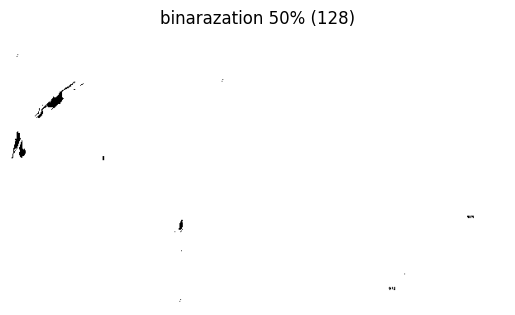

In [27]:
def binarize_image(image, threshold):
    binary_image = (image > threshold).astype(np.uint8) * 255
    return binary_image

# binaraziation
binary_image = binarize_image(image, 128)

plt.imshow(binary_image, cmap='gray')
plt.title('binarazation 50% (128)')
plt.axis('off')
plt.show()


Binaryzacja - dodanie możliwości wprowadzenia progu w czasie działania programu

input threshold for binarization: 200


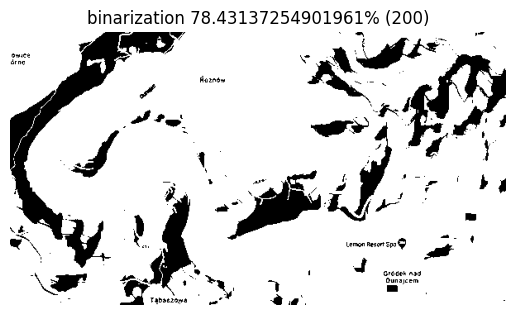

In [36]:
def binarize_image_with_threshold(image, threshold):
    return binarize_image(image, threshold)

user_threshold = int(input("input threshold for binarization: "))
binary_image_custom_threshold = binarize_image_with_threshold(image, user_threshold)

user_percent = (user_threshold * 100) / 255

plt.imshow(binary_image_custom_threshold, cmap='gray')
plt.title(f'binarization {user_percent}% ({user_threshold})')
plt.axis('off')
plt.show()